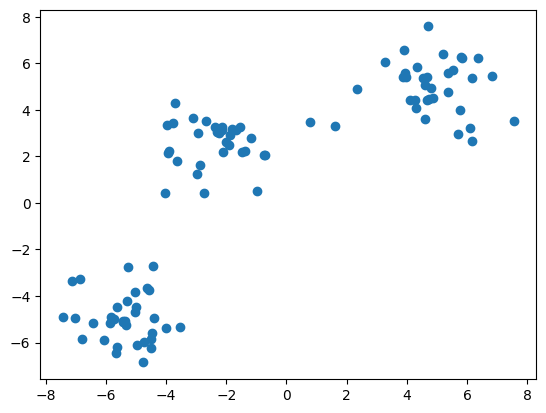

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np
# Centroids data points positions
centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]

# Data Generation throught the sklearn
X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

# Presentation of that data
plt.scatter(X[:,0],X[:,1])
plt.show()


In [ ]:
# K-means in python scratch
class KMeans:
    # Constructor process for our class
    def __init__(self,n_clusters=2, max_iteration=100):
        self.n_clusters = n_clusters
        self.max_iteration = max_iteration
        self.centroids = None

    def fit_predict(self,X):
      random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
      self.centroids = X[random_index]

      for i in range(self.max_iteration):
        # Assign cluster
        cluster_group = self.assign_cluster(X)
        old_centroids = self.centroids
        # Move centroids
        self.centroids = self.move_centroids(X, cluster_group)
        # Check Finish
        if (old_centroids == self.centroids).all():
          break

      return cluster_group

    def assign_cluster(self,X):
      cluster_group = []



      for row in X:
        distances = []
        for centroid in self.centroids:
           distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
        min_distances = min(distances)
        index_pos  = distances.index(min_distances)
        cluster_group.append(index_pos)
        distances.clear()

      return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
       new_centroids = []

       cluster_type = np.unique(cluster_group)

       for type_data in cluster_type:
         new_centroids.append(X[cluster_group == type_data].mean(axis=0))

       return np.array(new_centroids)








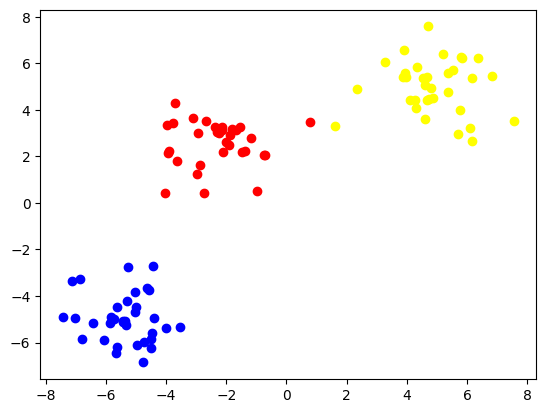

In [ ]:
km = KMeans(n_clusters=3,max_iteration=100)
y_means = km.fit_predict(X)



# Presentation of the data
plt.scatter(X[y_means == 0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means==1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means==2,1],color='yellow')
plt.show()